In [21]:
%matplotlib inline
import urllib
from bs4 import BeautifulSoup
import requests
import pandas as pd
import requests
import pandas as pd
import os 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize

In [10]:
#boxscore retrieval scraping code
def scrape_boxcore(kurl,kteam):
    link = 'http://www.baseball-reference.com/'
    home_game_urls = []
    
    for url, team in zip(kurl,kteam):
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        team_schedule  = soup.find("table", {"id":"team_schedule"})
        
        for row in team_schedule.find_all('tr')[1:]:
            try:
                for cell in row.find_all('td')[3]:  
                    link = 'http://www.baseball-reference.com' + cell.get("href")
                    link.encode('utf8')
        #             print link
                    if str(link).find(team) != -1:
                        home_game_urls.append(str(link))
                    else:
                        pass
            except:
                pass
    return home_game_urls

In [11]:
#away pitcher stat line retrieval scrape
def get_away_pitcher(list_of_urls):
    records = []
    for url in list_of_urls:
        # Make a request
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        pitchers_and_hitters  = soup.find_all("div", {"class":"table_container"})

        # Where is the stat line
        away_pitchers = pitchers_and_hitters[2].find_all("tr", {"normal_text"})
        pitchers = away_pitchers[1].find_all('td')

        record =[]
        for pitcher in pitchers:
            pitcher_stat =  pitcher.get_text()
            pitcher_stat.encode('utf8')
            record.append(pitcher_stat)
        records.append(record)

    return records

In [12]:
#home pitcher state line retrieval scrape 
def get_home_pitcher(list_of_urls):
    records = []
    for url in list_of_urls:
        # Make a request
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        pitchers_and_hitters  = soup.find_all("div", {"class":"table_container"})
        
        # Where is the stat line
        away_pitchers = pitchers_and_hitters[3].find_all("tr", {"normal_text"})
        pitchers = away_pitchers[1].find_all('td')
        
        record =[]
        for pitcher in pitchers:
            pitcher_stat =  pitcher.get_text()
            pitcher_stat.encode('utf8')
            record.append(pitcher_stat)
        records.append(record)

    return records

In [21]:
#defining variables to scrape
teams = ['ARI', 'BAL', 'BOS', 'COL', 'HOU', 'MIL', 'MIN', 'NYY', 'TEX', 'TOR']
easy_teams =['ATL','CHC', 'CHW', 'CIN', 'CLE', 'DET', 'KCR', 'ANA', 'LAD', 'FLA' 'NYM', 'OAK', 'PHI', 'PIT', 'SDP', 'SFG', 'SEA', 'STL', 'TBD','WSN']
years = [2014, 2015, 2016]
iurl=[]
iteam = []
iyear =[]
jurl = []
jteam = []
jyear = []
for team in teams:
    for year in years:
        iteam.append(team)
        iyear.append(year)
        iurl.append('http://www.baseball-reference.com/teams/' + team +'/' + str(year) + '-schedule-scores.shtml')
for easy in easy_teams:
    for year in years:
        jteam.append(team)
        jyear.append(year)
        jurl.append('http://www.baseball-reference.com/teams/' + team +'/' + str(year) + '-schedule-scores.shtml')
        
#print iurl, iteam    

In [6]:
list_of_urls = scrape_boxcore(iurl,iteam)

In [25]:
len(list_of_urls)

2202

In [22]:
easy_list = scrape_boxcore(jurl,jteam)

In [23]:
len(easy_list)

4826

In [14]:
list_of_urls[0:2]

['http://www.baseball-reference.com/boxes/ARI/ARI201403220.shtml',
 'http://www.baseball-reference.com/boxes/ARI/ARI201403230.shtml']

In [15]:
away_records = get_away_pitcher(list_of_urls[:1828])
away_records

[[u'Clayton Kershaw, W (1-0)',
  u' 6.2',
  u'5',
  u'1',
  u'1',
  u'1',
  u'7',
  u'0',
  u'1.35',
  u'27',
  u'102',
  u'73',
  u'36',
  u'17',
  u'20',
  u'13',
  u'6',
  u'5',
  u'0',
  u'66',
  u'',
  u'',
  u'0.264',
  u' 1.08',
  u'  1.9'],
 [u'Hyun-jin Ryu, W (1-0)',
  u' 5  ',
  u'2',
  u'0',
  u'0',
  u'1',
  u'5',
  u'0',
  u'0.00',
  u'19',
  u'87',
  u'55',
  u'27',
  u'8',
  u'20',
  u'3',
  u'10',
  u'5',
  u'0',
  u'67',
  u'',
  u'',
  u'0.216',
  u' 0.89',
  u'  2.3'],
 [u'Madison Bumgarner',
  u' 4  ',
  u'6',
  u'4',
  u'0',
  u'2',
  u'3',
  u'0',
  u'0.00',
  u'21',
  u'78',
  u'48',
  u'30',
  u'6',
  u'12',
  u'9',
  u'7',
  u'2',
  u'0',
  u'43',
  u'',
  u'',
  u'-0.290',
  u' 1.32',
  u' -2.2'],
 [u'Matt Cain',
  u' 5  ',
  u'7',
  u'3',
  u'2',
  u'2',
  u'2',
  u'0',
  u'3.60',
  u'23',
  u'99',
  u'57',
  u'35',
  u'5',
  u'17',
  u'12',
  u'7',
  u'4',
  u'0',
  u'43',
  u'',
  u'',
  u'0.002',
  u' 1.32',
  u' -0.7'],
 [u'Tim Hudson, W (1-0)',
  u' 7.2'

In [18]:
home_records=get_home_pitcher(list_of_urls[:1828])
home_records

KeyboardInterrupt: 

In [20]:
away_records2= get_away_pitcher(list_of_urls[1828:])

KeyboardInterrupt: 

In [26]:
home_records2 = get_home_pitcher(list_of_urls[1828:])
home_records2

KeyboardInterrupt: 

In [27]:
easy_away_records = get_away_pitcher(easy_list[:1608])

In [28]:
easy_away_records2 = get_away_pitcher(easy_list[1608:3216])

In [29]:
easy_away_records3 = get_away_pitcher(easy_list[3216:])

In [30]:
easy_home_records = get_home_pitcher(easy_list[:1608])

In [32]:
easy_home_records2 = get_home_pitcher(easy_list[1608:3216])

In [33]:
easy_home_records3 = get_home_pitcher(easy_list[3216:])

In [31]:
df_easy_away1 = pd.DataFrame(data=easy_away_records)
df_easy_away2 = pd.DataFrame(data=easy_away_records2)
df_easy_away3 = pd.DataFrame(data=easy_away_records3)
df_easy_a = pd.concat([df_easy_away1, df_easy_away2], axis = 0)
df_easy_away = pd.concat([df_easy_a, df_easy_away3], axis = 0)

In [35]:
df_easy_home1 = pd.DataFrame(data=easy_home_records)
df_easy_home2 = pd.DataFrame(data=easy_home_records2)
df_easy_home3 = pd.DataFrame(data=easy_home_records3)
df_easy_h = pd.concat([df_easy_home1, df_easy_home2], axis = 0)
df_easy_home = pd.concat([df_easy_h, df_easy_home3], axis = 0)

In [ ]:
#away_records.append(get_away_pitcher(list_of_urls[1828:]))
#home_records.append(get_home_pitcher(list_of_urls[1828:]))

In [34]:
df_home1 = pd.DataFrame(data=home_records)
df_home2 = pd.DataFrame(data=home_records2)
df_away1 = pd.DataFrame(data=away_records)
df_away2 = pd.DataFrame(data=away_records2)
df_home = pd.concat([df_home1, df_home2], axis = 0)
df_away = pd.concat([df_away1, df_away2], axis = 0)

NameError: name 'home_records' is not defined

In [15]:
baseball = pd.concat([df_home, df_away], axis=0)

In [36]:
easy_baseball = pd.concat([df_easy_home, df_easy_away], axis=0)

In [39]:
easy_baseball.to_csv('easy_baseball.csv')

In [5]:
easy_baseball2= pd.read_csv('easy_baseball.csv', header = 0, names = baseball_cols)
easy_baseball2.head()

,Name,IP,H,R,ER,BB,K,HR,ERA,BF,...,GB,FB,LD,Unk,GSc,IR,IS,WPA,aLI,RE24
0,"Dustin McGowan, L (0-1)",2.2,8,4,4,1,3,0,13.50,17,...,5,8,5,0,28,NaN,NaN,-0.345,1.34,-2.9
1,"R.A. Dickey, W (1-1)",6.2,5,0,0,1,6,0,4.63,25,...,9,8,3,0,69,NaN,NaN,0.405,1.25,3.0
2,"Drew Hutchison, L (1-1)",3.1,6,6,6,3,6,1,6.23,20,...,4,6,2,0,27,NaN,NaN,-0.367,0.91,-4.6
3,"Mark Buehrle, W (2-0)",5.1,8,1,1,1,3,0,0.64,24,...,9,11,8,0,50,NaN,NaN,0.159,1.32,1.3
4,"Brandon Morrow, W (1-1)",6.0,5,3,3,1,9,1,5.73,24,...,8,6,3,0,58,NaN,NaN,0.151,1.01,-0.2


In [6]:
easy_baseball2.set_index('Name').head()

,IP,H,R,ER,BB,K,HR,ERA,BF,Pit,...,GB,FB,LD,Unk,GSc,IR,IS,WPA,aLI,RE24
Name,,,,,,,,,,,,,,,,,,,,,
"Dustin McGowan, L (0-1)",2.2,8,4,4,1,3,0,13.50,17,72,...,5,8,5,0,28,NaN,NaN,-0.345,1.34,-2.9
"R.A. Dickey, W (1-1)",6.2,5,0,0,1,6,0,4.63,25,108,...,9,8,3,0,69,NaN,NaN,0.405,1.25,3.0
"Drew Hutchison, L (1-1)",3.1,6,6,6,3,6,1,6.23,20,78,...,4,6,2,0,27,NaN,NaN,-0.367,0.91,-4.6
"Mark Buehrle, W (2-0)",5.1,8,1,1,1,3,0,0.64,24,81,...,9,11,8,0,50,NaN,NaN,0.159,1.32,1.3
"Brandon Morrow, W (1-1)",6.0,5,3,3,1,9,1,5.73,24,86,...,8,6,3,0,58,NaN,NaN,0.151,1.01,-0.2


In [7]:
import re
easy_baseball2['Name'] = easy_baseball2['Name'].str.replace(r"\,.*\)","")
easy_baseball2.head()

,Name,IP,H,R,ER,BB,K,HR,ERA,BF,...,GB,FB,LD,Unk,GSc,IR,IS,WPA,aLI,RE24
0,Dustin McGowan,2.2,8,4,4,1,3,0,13.50,17,...,5,8,5,0,28,NaN,NaN,-0.345,1.34,-2.9
1,R.A. Dickey,6.2,5,0,0,1,6,0,4.63,25,...,9,8,3,0,69,NaN,NaN,0.405,1.25,3.0
2,Drew Hutchison,3.1,6,6,6,3,6,1,6.23,20,...,4,6,2,0,27,NaN,NaN,-0.367,0.91,-4.6
3,Mark Buehrle,5.1,8,1,1,1,3,0,0.64,24,...,9,11,8,0,50,NaN,NaN,0.159,1.32,1.3
4,Brandon Morrow,6.0,5,3,3,1,9,1,5.73,24,...,8,6,3,0,58,NaN,NaN,0.151,1.01,-0.2


In [8]:
easy_baseball2.drop(['GSc', 'IR', 'IS','WPA','aLI', 'RE24', 'Unk'], axis=1, inplace=True)
easy_baseball2.head()

,Name,IP,H,R,ER,BB,K,HR,ERA,BF,Pit,Str,Ctct,StS,StL,GB,FB,LD
0,Dustin McGowan,2.2,8,4,4,1,3,0,13.50,17,72,45,29,4,12,5,8,5
1,R.A. Dickey,6.2,5,0,0,1,6,0,4.63,25,108,69,41,12,16,9,8,3
2,Drew Hutchison,3.1,6,6,6,3,6,1,6.23,20,78,49,22,13,14,4,6,2
3,Mark Buehrle,5.1,8,1,1,1,3,0,0.64,24,81,50,30,8,12,9,11,8
4,Brandon Morrow,6.0,5,3,3,1,9,1,5.73,24,86,60,25,19,16,8,6,3


In [9]:
easy_baseball2.groupby('Name')
easy_baseball2.sort('Name', ascending = True)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Name,IP,H,R,ER,BB,K,HR,ERA,BF,Pit,Str,Ctct,StS,StL,GB,FB,LD
691,A.J. Burnett,6.0,9,7,6,2,4,3,2.90,27,103,59,32,9,18,8,12,6
861,A.J. Burnett,6.0,9,7,6,2,4,3,2.90,27,103,59,32,9,18,8,12,6
607,A.J. Burnett,6.0,9,7,6,2,4,3,2.90,27,103,59,32,9,18,8,12,6
267,A.J. Burnett,6.0,9,7,6,2,4,3,2.90,27,103,59,32,9,18,8,12,6
521,A.J. Burnett,6.0,9,7,6,2,4,3,2.90,27,103,59,32,9,18,8,12,6
13,A.J. Burnett,6.0,9,7,6,2,4,3,2.90,27,103,59,32,9,18,8,12,6
1537,A.J. Burnett,6.0,9,7,6,2,4,3,2.90,27,103,59,32,9,18,8,12,6
945,A.J. Burnett,6.0,9,7,6,2,4,3,2.90,27,103,59,32,9,18,8,12,6
183,A.J. Burnett,6.0,9,7,6,2,4,3,2.90,27,103,59,32,9,18,8,12,6
1199,A.J. Burnett,6.0,9,7,6,2,4,3,2.90,27,103,59,32,9,18,8,12,6


In [10]:
easy_baseball2.isnull().sum()

Name    0
IP      0
H       0
R       0
ER      0
BB      0
K       0
HR      0
ERA     0
BF      0
Pit     0
Str     0
Ctct    0
StS     0
StL     0
GB      0
FB      0
LD      0
dtype: int64

In [11]:
QS = []
for x,y in zip(easy_baseball2['IP'].values, easy_baseball2['ER'].values):
    if x >= 6.0:
        if y <= 3.0:
            QS.append(1)
        else:
            QS.append(0)
    else:
        QS.append(0)

In [12]:
easy_baseball2['QS'] = QS

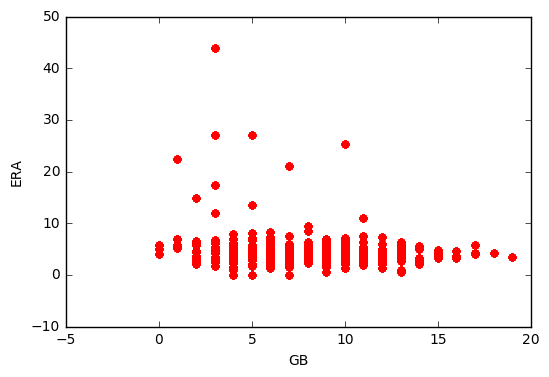

In [15]:
plt.scatter(easy_baseball2['GB'], easy_baseball2['ERA'], color='r')
plt.xlabel("GB")
plt.ylabel("ERA")
plt.show()
#infinity = max(easy_baseball2.QS)
#easy_baseball3 = easy_baseball2[easy_baseball2.QS != infinity]

In [18]:
#Ensured no infinite values existed, along with nulls for easy_baseball dataset
max(easy_baseball2.ERA)

43.880000000000003

In [19]:
easy_baseball2.to_csv("easy_baseball2.csv")

In [16]:
baseball.to_csv("baseball.csv")
len(baseball)

4398

In [4]:
baseball_cols = ['Name', 'IP', 'H', 'R','ER','BB','K','HR','ERA','BF','Pit','Str', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD', 'Unk', 'GSc', 'IR', 'IS', 'WPA', 'aLI', 'RE24']

In [7]:
baseball3 = pd.read_csv('baseball.csv', header = 0, names = baseball_cols)
baseball3.head()

,Name,IP,H,R,ER,BB,K,HR,ERA,BF,...,GB,FB,LD,Unk,GSc,IR,IS,WPA,aLI,RE24
0,"Wade Miley, L (0-1)",5.0,3,3,3,2,8,1,5.40,22,...,6.0,7.0,3.0,0.0,55,NaN,NaN,-0.129,0.83,-0.7
1,"Trevor Cahill, L (0-1)",4.0,8,5,5,4,1,0,11.25,23,...,8.0,9.0,6.0,0.0,23,NaN,NaN,-0.223,0.86,-2.5
2,Brandon McCarthy,6.2,6,5,5,1,4,1,6.75,27,...,11.0,11.0,5.0,0.0,45,NaN,NaN,0.003,0.93,-1.1
3,"Wade Miley, W (1-1)",7.0,6,4,4,1,5,1,5.25,28,...,11.0,11.0,5.0,0.0,53,NaN,NaN,-0.030,1.18,-0.8
4,"Trevor Cahill, L (0-2)",6.0,4,2,2,3,3,0,6.30,25,...,9.0,10.0,5.0,0.0,56,NaN,NaN,0.013,0.94,0.7


In [6]:
baseball3.set_index('Name').head()

,IP,H,R,ER,BB,K,HR,ERA,BF,Pit,...,GB,FB,LD,Unk,GSc,IR,IS,WPA,aLI,RE24
Name,,,,,,,,,,,,,,,,,,,,,
"Wade Miley, L (0-1)",5.0,3,3,3,2,8,1,5.40,22,83.0,...,6.0,7.0,3.0,0.0,55,NaN,NaN,-0.129,0.83,-0.7
"Trevor Cahill, L (0-1)",4.0,8,5,5,4,1,0,11.25,23,89.0,...,8.0,9.0,6.0,0.0,23,NaN,NaN,-0.223,0.86,-2.5
Brandon McCarthy,6.2,6,5,5,1,4,1,6.75,27,94.0,...,11.0,11.0,5.0,0.0,45,NaN,NaN,0.003,0.93,-1.1
"Wade Miley, W (1-1)",7.0,6,4,4,1,5,1,5.25,28,92.0,...,11.0,11.0,5.0,0.0,53,NaN,NaN,-0.030,1.18,-0.8
"Trevor Cahill, L (0-2)",6.0,4,2,2,3,3,0,6.30,25,93.0,...,9.0,10.0,5.0,0.0,56,NaN,NaN,0.013,0.94,0.7


In [7]:
import re
baseball3['Name'] = baseball3['Name'].str.replace(r"\,.*\)","")
baseball3.head()

,Name,IP,H,R,ER,BB,K,HR,ERA,BF,...,GB,FB,LD,Unk,GSc,IR,IS,WPA,aLI,RE24
0,Wade Miley,5.0,3,3,3,2,8,1,5.40,22,...,6.0,7.0,3.0,0.0,55,NaN,NaN,-0.129,0.83,-0.7
1,Trevor Cahill,4.0,8,5,5,4,1,0,11.25,23,...,8.0,9.0,6.0,0.0,23,NaN,NaN,-0.223,0.86,-2.5
2,Brandon McCarthy,6.2,6,5,5,1,4,1,6.75,27,...,11.0,11.0,5.0,0.0,45,NaN,NaN,0.003,0.93,-1.1
3,Wade Miley,7.0,6,4,4,1,5,1,5.25,28,...,11.0,11.0,5.0,0.0,53,NaN,NaN,-0.030,1.18,-0.8
4,Trevor Cahill,6.0,4,2,2,3,3,0,6.30,25,...,9.0,10.0,5.0,0.0,56,NaN,NaN,0.013,0.94,0.7


In [10]:
baseball3.drop(['GSc', 'IR', 'IS','WPA','aLI', 'RE24', 'Unk'], axis=1, inplace=True)
baseball3.head()

ValueError: labels ['GSc' 'IR' 'IS' 'WPA' 'aLI' 'RE24'] not contained in axis

In [11]:
baseball3.drop(['Unk'], axis=1, inplace=True)

In [12]:
baseball3.to_csv("baseball3point2.csv")

In [13]:
baseball3.groupby('Name')

In [14]:
baseball3.sort('Name', ascending = True)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Name,IP,H,R,ER,BB,K,HR,ERA,BF,Pit,Str,Ctct,StS,StL,GB,FB,LD
133,A.J. Burnett,6.0,9,7,6,2,4,3,2.90,27,103.0,59.0,32.0,9.0,18.0,8.0,12.0,6.0
1702,A.J. Burnett,6.0,7,1,1,2,3,0,1.50,27,97.0,62.0,34.0,10.0,18.0,9.0,12.0,8.0
882,A.J. Burnett,5.2,6,3,2,4,5,1,3.15,27,98.0,54.0,32.0,5.0,17.0,10.0,7.0,6.0
14,A.J. Burnett,8.0,5,0,0,0,8,0,2.15,29,102.0,68.0,39.0,8.0,21.0,10.0,10.0,6.0
90,A.J. Burnett,7.0,5,1,1,2,4,0,1.80,27,88.0,54.0,32.0,5.0,17.0,10.0,11.0,4.0
464,A.J. Cole,7.0,5,4,4,2,8,2,5.14,28,108.0,67.0,38.0,11.0,18.0,5.0,13.0,2.0
1206,A.J. Griffin,7.0,4,2,2,1,7,2,4.78,24,92.0,56.0,33.0,7.0,16.0,6.0,10.0,2.0
113,A.J. Griffin,4.1,7,4,4,2,4,2,5.07,21,74.0,46.0,25.0,8.0,13.0,5.0,10.0,6.0
110,A.J. Griffin,1.2,3,3,3,4,1,0,4.94,13,52.0,23.0,15.0,3.0,5.0,0.0,7.0,5.0
945,A.J. Griffin,4.2,7,5,5,3,5,1,4.38,23,97.0,61.0,27.0,10.0,24.0,6.0,9.0,6.0


In [17]:
easy_baseball2.isnull().sum()

Name    0
IP      0
H       0
R       0
ER      0
BB      0
K       0
HR      0
ERA     0
BF      0
Pit     1
Str     1
Ctct    1
StS     1
StL     1
GB      1
FB      1
LD      1
dtype: int64

In [60]:
easy_baseball2

,Name,IP,H,R,ER,BB,K,HR,ERA,BF,Pit,Str,Ctct,StS,StL,GB,FB,LD,QS
0,Dustin McGowan,2.2,8,4,4,1,3,0,13.50,17,72,45,29,4,12,5,8,5,0
1,R.A. Dickey,6.2,5,0,0,1,6,0,4.63,25,108,69,41,12,16,9,8,3,1
2,Drew Hutchison,3.1,6,6,6,3,6,1,6.23,20,78,49,22,13,14,4,6,2,0
3,Mark Buehrle,5.1,8,1,1,1,3,0,0.64,24,81,50,30,8,12,9,11,8,0
4,Brandon Morrow,6.0,5,3,3,1,9,1,5.73,24,86,60,25,19,16,8,6,3,1
5,R.A. Dickey,7.0,6,5,5,3,4,2,5.30,29,112,71,39,13,19,8,14,4,0
6,R.A. Dickey,6.0,6,3,3,3,6,1,5.90,28,99,62,35,14,13,9,9,2,1
7,Dustin McGowan,4.0,5,6,6,1,5,2,6.88,18,70,43,22,9,12,4,7,0,0
8,Drew Hutchison,6.0,6,2,2,1,9,1,3.46,25,102,63,35,14,14,5,10,5,1
9,Mark Buehrle,5.1,12,7,6,3,0,1,2.16,27,101,64,37,3,24,6,18,14,0


In [24]:
baseball3 = baseball3.dropna()

In [25]:
baseball3.isnull().sum()

Name    0
IP      0
H       0
R       0
ER      0
BB      0
K       0
HR      0
ERA     0
BF      0
Pit     0
Str     0
Ctct    0
StS     0
StL     0
GB      0
FB      0
LD      0
dtype: int64

In [26]:
#baseball3.to_csv("baseball3point3.csv")
baseball3.dtypes

Name     object
IP      float64
H         int64
R         int64
ER        int64
BB        int64
K         int64
HR        int64
ERA     float64
BF        int64
Pit     float64
Str     float64
Ctct    float64
StS     float64
StL     float64
GB      float64
FB      float64
LD      float64
dtype: object

In [29]:
baseball3['FIP'] = ((((13*baseball3.HR)+(3*baseball3.BB)-(2*baseball3.K))/baseball3.IP)+3.2)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
#Create a column for Quality Starts
QS = []

for x,y in zip( baseball3['IP'].values,baseball3['ER'].values):
    if x >= 6.0:
        if y <= 3.0:
            QS.append(1)
        else:
            QS.append(0)
    else:
        QS.append(0)



In [41]:
baseball3['QS'] = QS

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
baseball3

In [42]:
baseball3

,Name,IP,H,R,ER,BB,K,HR,ERA,BF,Pit,Str,Ctct,StS,StL,GB,FB,LD,FIP,QS
0,Wade Miley,5.0,3,3,3,2,8,1,5.40,22,83.0,54.0,28.0,11.0,15.0,6.0,7.0,3.0,3.800000,0
1,Trevor Cahill,4.0,8,5,5,4,1,0,11.25,23,89.0,48.0,35.0,3.0,10.0,8.0,9.0,6.0,5.700000,0
2,Brandon McCarthy,6.2,6,5,5,1,4,1,6.75,27,94.0,63.0,36.0,7.0,20.0,11.0,11.0,5.0,4.490323,0
3,Wade Miley,7.0,6,4,4,1,5,1,5.25,28,92.0,65.0,35.0,12.0,18.0,11.0,11.0,5.0,4.057143,0
4,Trevor Cahill,6.0,4,2,2,3,3,0,6.30,25,93.0,55.0,32.0,7.0,16.0,9.0,10.0,5.0,3.700000,1
5,Bronson Arroyo,4.1,5,2,2,2,3,1,4.15,20,82.0,51.0,32.0,2.0,17.0,6.0,9.0,4.0,6.370732,0
6,Brandon McCarthy,7.0,10,6,6,1,4,1,7.78,31,96.0,65.0,43.0,10.0,12.0,18.0,8.0,8.0,4.342857,0
7,Wade Miley,5.0,8,5,5,3,4,1,5.04,25,102.0,60.0,34.0,6.0,20.0,8.0,10.0,7.0,6.000000,0
8,Trevor Cahill,4.0,5,7,6,5,8,2,9.17,22,98.0,54.0,21.0,16.0,17.0,5.0,4.0,1.0,9.450000,0
9,Josh Collmenter,4.0,5,3,3,1,3,0,3.75,18,73.0,49.0,33.0,4.0,12.0,6.0,8.0,3.0,2.450000,0


In [8]:
#baseball4 = pd.read_csv('baseball3point2.csv', header = 0)
baseball4 = pd.read_csv('baseball3point2.csv')

In [9]:
baseball4

,Unnamed: 0,Name,IP,H,R,ER,BB,K,HR,ERA,BF,Pit,Str,Ctct,StS,StL,GB,FB,LD
0,0,Wade Miley,5.0,3,3,3,2,8,1,5.40,22,83.0,54.0,28.0,11.0,15.0,6.0,7.0,3.0
1,1,Trevor Cahill,4.0,8,5,5,4,1,0,11.25,23,89.0,48.0,35.0,3.0,10.0,8.0,9.0,6.0
2,2,Brandon McCarthy,6.2,6,5,5,1,4,1,6.75,27,94.0,63.0,36.0,7.0,20.0,11.0,11.0,5.0
3,3,Wade Miley,7.0,6,4,4,1,5,1,5.25,28,92.0,65.0,35.0,12.0,18.0,11.0,11.0,5.0
4,4,Trevor Cahill,6.0,4,2,2,3,3,0,6.30,25,93.0,55.0,32.0,7.0,16.0,9.0,10.0,5.0
5,5,Bronson Arroyo,4.1,5,2,2,2,3,1,4.15,20,82.0,51.0,32.0,2.0,17.0,6.0,9.0,4.0
6,6,Brandon McCarthy,7.0,10,6,6,1,4,1,7.78,31,96.0,65.0,43.0,10.0,12.0,18.0,8.0,8.0
7,7,Wade Miley,5.0,8,5,5,3,4,1,5.04,25,102.0,60.0,34.0,6.0,20.0,8.0,10.0,7.0
8,8,Trevor Cahill,4.0,5,7,6,5,8,2,9.17,22,98.0,54.0,21.0,16.0,17.0,5.0,4.0,1.0
9,9,Josh Collmenter,4.0,5,3,3,1,3,0,3.75,18,73.0,49.0,33.0,4.0,12.0,6.0,8.0,3.0


In [1]:
baseball4=baseball4.drop("Unnamed: 0",axis=1)

NameError: name 'baseball4' is not defined

In [ ]:
easy_baseball2

In [ ]:
baseball4['GB_rate'] = baseball4.GB/(baseball4.GB +baseball4.FB+baseball4.LD)
baseball4['FB_rate'] = baseball4.FB/(baseball4.GB +baseball4.FB+baseball4.LD)
baseball4['LD_rate'] = baseball4.LD/(baseball4.GB +baseball4.FB+baseball4.LD)

In [ ]:
#Create a column for Quality Starts
QS = []

for x,y in zip( baseball4['IP'].values,baseball4['ER'].values):
    if x >= 6.0:
        if y <= 3.0:
            QS.append(1)
        else:
            QS.append(0)
    else:
        QS.append(0)

In [ ]:
baseball4['QS'] = QS

In [ ]:
baseball4['FIP'] = ((((13*baseball4.HR)+(3*baseball4.BB)-(2*baseball4.K))/baseball4.IP)+3.2)

In [ ]:
baseball4.QS.value_counts()

In [ ]:
baseball4 = baseball4.dropna()

In [ ]:
baseball4.isnull().sum()

In [ ]:
infinity = max(baseball4.FIP)
baseball5 = baseball4[baseball4.FIP != infinity]

In [23]:
baseball5 = pd.read_csv("baseball5")

In [ ]:
#X = baseball5[['IP', 'H','R','ER','BB','K','HR', 'ERA','BF','Pit','Str', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
y1 = baseball5.FIP
y2= baseball5.QS

In [ ]:
xs = baseball5["GB"]
ys = baseball5["FIP"]
plt.scatter(xs, ys, color='b')
plt.xlabel("GB")
plt.ylabel("FIP")
plt.show()

xs = baseball5["GB"]
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = baseball5["FIP"]
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("GB standardized")
plt.ylabel("FIP standardized")
plt.show()

In [ ]:
#Considered dropping extreme outliers, but opted to keep as bad performance not good reason, injuries not always early either and very time-consuming to track all down 
baseball5[baseball5['FIP'] > 50]

In [ ]:
#X = baseball5[['BB','K','Pit', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
plt.matshow(X.corr())

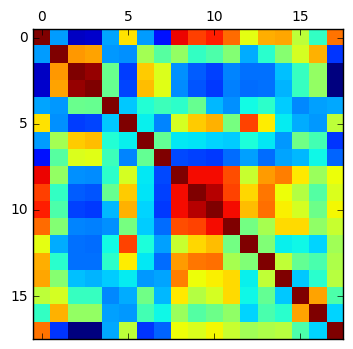

In [22]:
plt.matshow(easy_baseball2.corr())

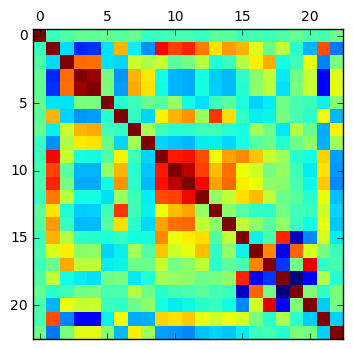

In [24]:
plt.matshow(baseball5.corr())